# Installing the PRAW package



!pip install praw

# Authentication

In [1]:
import praw 

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DcyXG2z-Ud3hSjn9xeAqrg",
    client_secret="h9BdnESVlkGpi33zxqdtnJPZ1qhS6A",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("starwars").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Seagate and R/StarWars are partnering up for another giveaway: a 2TB Seagate STAR WARS JEDI: Fallen Order Game Drive
1an9gcf
AutoModerator
1707544750.0
18
0.91
https://www.reddit.com/r/StarWars/comments/1an9gcf/seagate_and_rstarwars_are_partnering_up_for/
0


# Get total comment in Subreddit

In [4]:
headlines = set()
for submission in reddit.subreddit("starwars").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

770


In [5]:
#Create a dataframe from the scrapped data 
df = pd.DataFrame(headlines)
df.head()

,0
0,Phantom Menace is finally on Playstation Plus ...
1,Images That Were Floating Around Yesterday
2,Yoda had good advice
3,Painted the binary sunset last night
4,"I’ve just met Caij Vanda, and I am so curious ..."


In [6]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [7]:
df.columns = ['Titles']

In [8]:
df.head()

,Titles
0,Phantom Menace is finally on Playstation Plus ...
1,Images That Were Floating Around Yesterday
2,Yoda had good advice
3,Painted the binary sunset last night
4,"I’ve just met Caij Vanda, and I am so curious ..."


In [9]:
df.Titles.duplicated().sum() 

0

# REDDIT APP DATA PREPROCESSING


In [10]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)



In [11]:
#Show the cleandf.head()
df.head()

,Titles
0,Phantom Menace is finally on Playstation Plus ...
1,Images That Were Floating Around Yesterday
2,Yoda had good advice
3,Painted the binary sunset last night
4,"I’ve just met Caij Vanda, and I am so curious ..."


# cleaning

In [12]:

#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,Phantom Menace is finally on Playstation Plus ...
1,Images That Were Floating Around Yesterday
2,Yoda had good advice
3,Painted the binary sunset last night
4,"I’ve just met Caij Vanda, and I am so curious ..."


# TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB 



In [14]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,Phantom Menace is finally on Playstation Plus ...,1.000000,0.0
1,Images That Were Floating Around Yesterday,0.000000,0.0
2,Yoda had good advice,0.600000,0.7
3,Painted the binary sunset last night,0.066667,0.0
4,"I’ve just met Caij Vanda, and I am so curious ...",0.800000,0.2


# CATEGORIZING STARWARS SENTIMENT



In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Phantom Menace is finally on Playstation Plus ...,1.000000,0.000000,Neutral
1,Images That Were Floating Around Yesterday,0.000000,0.000000,Neutral
2,Yoda had good advice,0.600000,0.700000,Positive
3,Painted the binary sunset last night,0.066667,0.000000,Neutral
4,"I’ve just met Caij Vanda, and I am so curious ...",0.800000,0.200000,Positive
5,Clone Commando Battlefront 2 (2017),0.000000,0.000000,Neutral
6,The Menace …,0.000000,0.000000,Neutral
7,Does anyone know which comic this image is from?,0.500000,0.250000,Positive
8,(Original) Characters from my Original Star Wa...,0.750000,0.375000,Positive
9,Which of the movies do you find the most rewat...,0.500000,0.500000,Positive


# Data Visualization

In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
df.head()

,Titles,Subjectivity,Polarity,Insight
0,Phantom Menace is finally on Playstation Plus ...,1.000000,0.0,Neutral
1,Images That Were Floating Around Yesterday,0.000000,0.0,Neutral
2,Yoda had good advice,0.600000,0.7,Positive
3,Painted the binary sunset last night,0.066667,0.0,Neutral
4,"I’ve just met Caij Vanda, and I am so curious ...",0.800000,0.2,Positive


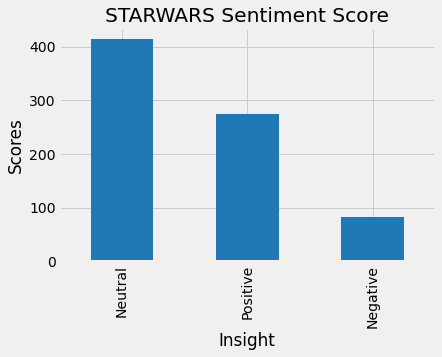

In [19]:
#Plot the values count of sentiment
plt.title("STARWARS Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Word Cloud


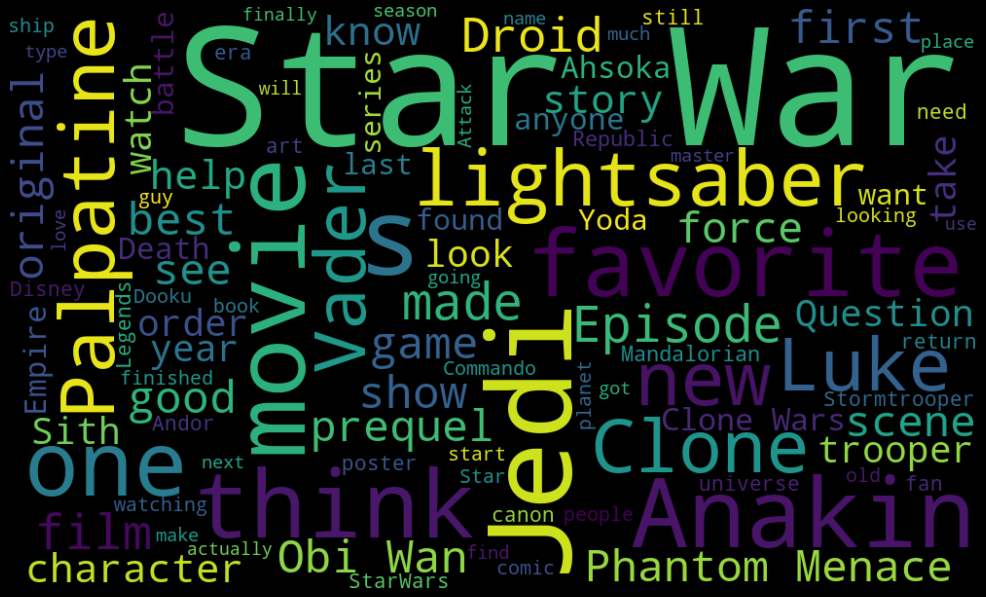

In [20]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
